In [6]:
# import os
import glob
# import re

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.draw import polygon, polygon2mask
from skimage import io


from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


### Configurations

In [2]:
data_path = 'sample/'

In [4]:
# saving data paths
imgs = glob.glob(data_path + '**\\*.png', recursive =True)

structs = {}
structs['tumor'] = glob.glob(data_path + '**\\*Tumor.txt', recursive =True)
structs['cc'] = glob.glob(data_path + '**\\*CA_CHA.txt', recursive =True)
structs['ps'] = glob.glob(data_path + '**\\*PV_SMV.txt', recursive =True)
structs['sma'] = glob.glob(data_path + '**\\*SMA.txt', recursive =True)

In [8]:
# data augmentation arguments
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
# configs from cousera
# training_datagen = ImageDataGenerator(
#       rescale = 1./255,
# 	    rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')

# data.py

In [17]:
def trainGenerator(batch_size,train_path,structs,aug_dict,image_color_mode = "grayscale",
                  image_save_prefix='image', save_to_dir=None,target_size = (256,256),seed = 1):
    
    image_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = None,
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)
    
#     for img in train_generator:
# #         mask = maskGenerator(img) #path?
#         yield(img)#, mask)

    return image_generator

In [62]:
result_data = trainGenerator(2,data_path,structs,data_gen_args)

Found 606 images belonging to 3 classes.


In [45]:
im = result_data.next()

In [1]:
plot_image = np.concatenate((im[0], im[1]), axis=1)
plt.imshow(plot_image)
plt.show()

NameError: name 'np' is not defined

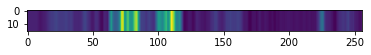

In [53]:
plt.imshow(im[1][240:, :])

In [61]:
im[1][235:, 2]

array([[109.31261],
       [110.68766],
       [112.43805],
       [113.75038],
       [117.12698],
       [115.56068],
       [115.     ],
       [115.     ],
       [115.     ],
       [115.     ],
       [115.     ],
       [115.     ],
       [115.     ],
       [115.     ],
       [115.     ],
       [115.     ],
       [115.     ],
       [115.     ],
       [115.     ],
       [115.     ],
       [115.     ]], dtype=float32)

In [22]:
def getSamplesFromDataGen(resultData):
    x = resultData.next() #fetch the first batch
    a = x[0] # train data
    b = x[1] # train label
    for i in range(0,5):
        plt.imshow(a[i])
        plt.title(b[i])
        plt.show()

606